<a href="https://colab.research.google.com/github/irmtou/CS577FinalProject/blob/aleWork/CS577FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
# import warnings
# warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('ca_san_diego_2020_04_01.csv')
display(df.head(10))

<ipython-input-4-a3f5c9021ff6>:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ca_san_diego_2020_04_01.csv')


,raw_row_number,date,time,service_area,subject_age,subject_race,subject_sex,type,arrest_made,citation_issued,...,outcome,contraband_found,search_conducted,search_person,search_vehicle,search_basis,reason_for_search,reason_for_stop,raw_action_taken,raw_subject_race_description
0,1,2014-01-01,01:25:00,110,24.0,white,male,vehicular,False,True,...,citation,NaN,False,False,False,NaN,NaN,Moving Violation,Citation,WHITE
1,2,2014-01-01,05:47:00,320,42.0,white,male,vehicular,False,False,...,warning,NaN,False,False,False,NaN,NaN,Moving Violation,Verbal Warning,WHITE
2,3,2014-01-01,07:46:00,320,29.0,asian/pacific islander,male,vehicular,False,False,...,warning,NaN,False,False,False,NaN,NaN,Moving Violation,Verbal Warning,LAOTIAN
3,4,2014-01-01,08:10:00,610,23.0,white,male,vehicular,False,True,...,citation,NaN,False,False,False,NaN,NaN,Moving Violation,Citation,WHITE
4,5,2014-01-01,08:35:00,930,35.0,hispanic,male,vehicular,False,True,...,citation,NaN,False,False,False,NaN,NaN,Equipment Violation,Citation,HISPANIC
5,6,2014-01-01,08:39:00,820,30.0,hispanic,male,vehicular,False,False,...,warning,NaN,False,False,False,NaN,NaN,Equipment Violation,Verbal Warning,HISPANIC
6,7,2014-01-01,09:13:00,710,19.0,hispanic,female,vehicular,False,True,...,citation,NaN,False,False,False,NaN,NaN,Moving Violation,Citation,HISPANIC
7,8,2014-01-01,09:50:00,120,32.0,white,male,vehicular,False,False,...,warning,NaN,False,False,False,NaN,NaN,Moving Violation,Written Warning,WHITE
8,9,2014-01-01,10:00:00,120,36.0,white,male,vehicular,False,True,...,citation,NaN,False,False,False,NaN,NaN,Moving Violation,Citation,WHITE
9,10,2014-01-01,10:40:00,120,27.0,hispanic,male,vehicular,False,True,...,citation,NaN,False,False,False,NaN,NaN,Moving Violation,Citation,HISPANIC



From observations, here is a reference of all categories
* Index - Indexing from 0
* `raw_row_number` - Indexing from 1
* `date` - yyyy-mm-dd
* `time` - 01:25:00
* `service_area` - Integer
* `subject_age` - Float
* `subject_race` - String
* `subject_sex` - String
* `type` - String
* `arrest_made` - Boolean
* `citation_issued` - String
* `outcome` - String
* `contraband_found` - NaN  
* `search_conducted` - Boolean
* `search_person` - Boolean
* `search_vehicle` - Boolean
* `search_basis` - NaN
* `reason_for_search` - NaN
* `reason_for_stop` - String
* `raw_action_taken` - String
* `raw_subject_race_description` - String



## Some Exploratory Data Analysis

Just a surface level analysis of our dataset


### Datatypes of variables


- Numerical data: `float64`, `int64`
- Categorical data: `object`  

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106961 entries, 0 to 106960
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   raw_row_number                106961 non-null  object 
 1   date                          106961 non-null  object 
 2   time                          106961 non-null  object 
 3   service_area                  106961 non-null  object 
 4   subject_age                   104855 non-null  float64
 5   subject_race                  106616 non-null  object 
 6   subject_sex                   106821 non-null  object 
 7   type                          106960 non-null  object 
 8   arrest_made                   106577 non-null  object 
 9   citation_issued               104414 non-null  object 
 10  warning_issued                104414 non-null  object 
 11  outcome                       101414 non-null  object 
 12  contraband_found              5531 non-null 

## Number of null values in the dataset

In [6]:
missing_values = df.isnull().sum()
missing_values

,0
raw_row_number,0
date,0
time,0
service_area,0
subject_age,2106
subject_race,345
subject_sex,140
type,1
arrest_made,384
citation_issued,2547


## Finding the percentage of null or missing values

In [7]:
null_percentage = (df.isnull().sum() / len(df)) * 100
null_percentage

,0
raw_row_number,0.000000
date,0.000000
time,0.000000
service_area,0.000000
subject_age,1.968942
subject_race,0.322547
subject_sex,0.130889
type,0.000935
arrest_made,0.359009
citation_issued,2.381242


## Checking for duplicates

In [8]:
df.nunique()

,0
raw_row_number,106961
date,261
time,1438
service_area,23
subject_age,88
subject_race,6
subject_sex,2
type,1
arrest_made,2
citation_issued,2


## Split yyyy-mm-dd into Year, Month, and Day

In [9]:
df['date']= pd.to_datetime(df['date'],format='%Y-%m-%d')
df['year']= df['date'].dt.year
df['month']= df['date'].dt.month
df['day']= df['date'].dt.day


# Split hh-mm-ss into Hour, Minute, and Second

In [10]:
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S')
df['hour'] = df['time'].dt.hour
df['minute'] = df['time'].dt.minute
df['second'] = df['time'].dt.second

# Frequency of Traffic Stops by each Hour

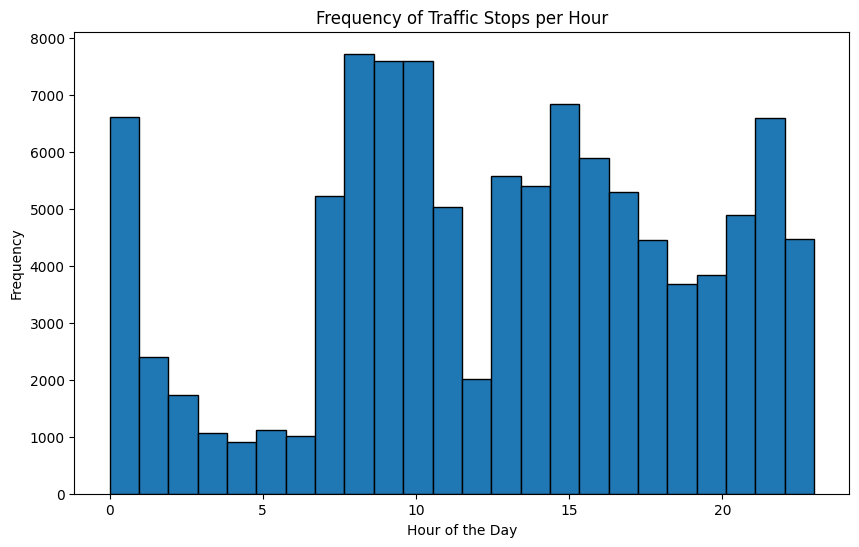

In [11]:
df['hour'].plot(kind='hist', bins=24, edgecolor='black', figsize=(10, 6))

plt.title("Frequency of Traffic Stops per Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Frequency")

plt.show()


# Day Vs Traffic Stops


In [12]:
end_month_citations = df[df['citation_issued'] == True].groupby('day').size()
print(end_month_citations)

# No real correlation

day
1     1871
2     2049
3     2420
4     2397
5     2422
6     1910
7     1895
8     2164
9     1944
10    2188
11    2291
12    2119
13    2055
14    2048
15    2109
16    2190
17    2154
18    2136
19    2237
20    1902
21    2421
22    2146
23    2085
24    1998
25    2201
26    1824
27    1857
28    1973
29    1875
30    1835
31     920
dtype: int64


# Ages

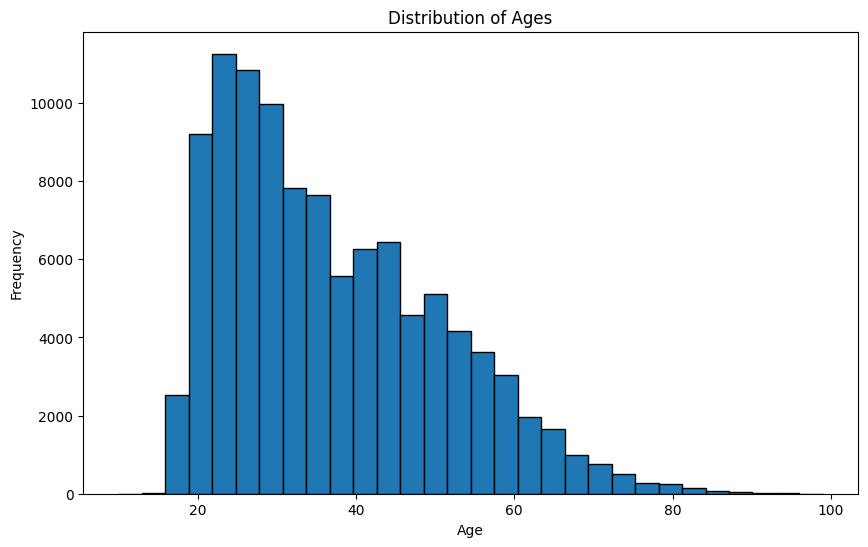

In [13]:
plt.figure(figsize=(10, 6))
df['subject_age'].plot(kind='hist', bins=30, edgecolor='black')

plt.title("Distribution of Ages")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Race

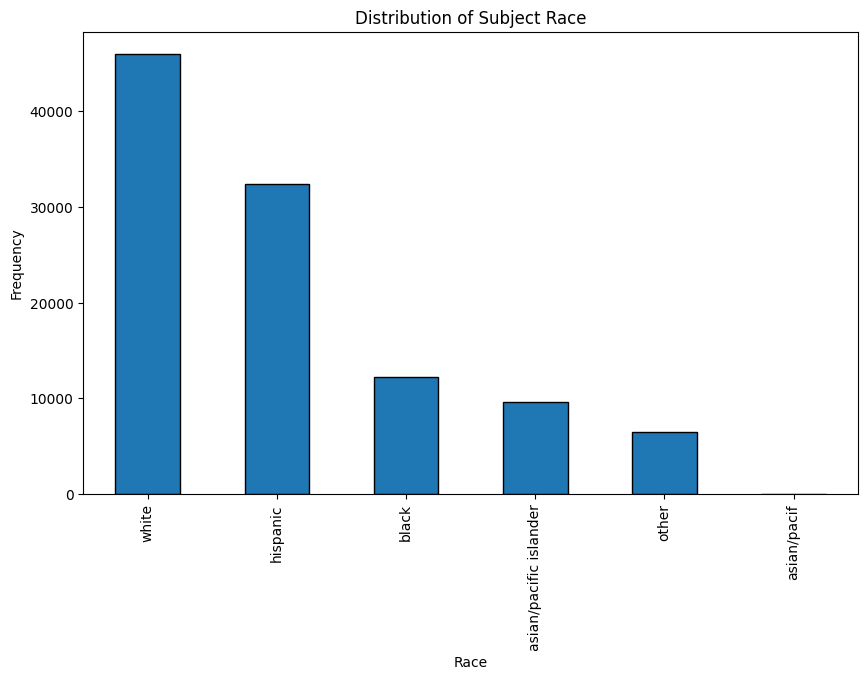

In [14]:
race_counts = df['subject_race'].value_counts()

plt.figure(figsize=(10, 6))
race_counts.plot(kind='bar', edgecolor='black')

plt.title("Distribution of Subject Race")
plt.xlabel("Race")
plt.ylabel("Frequency")
plt.show()

# Race x Age

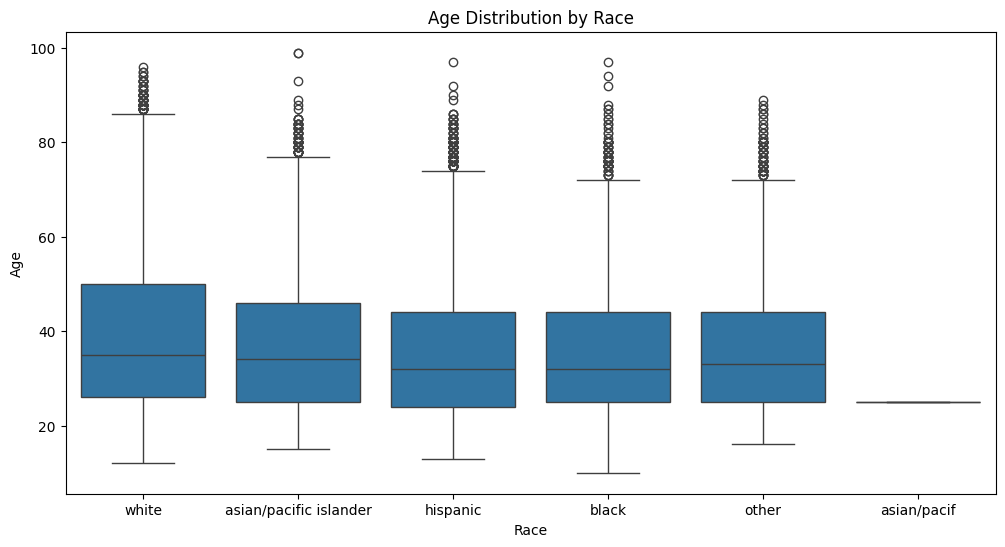

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='subject_race', y='subject_age', data=df)

plt.title("Age Distribution by Race")
plt.xlabel("Race")
plt.ylabel("Age")
plt.show()

# Age by Race (Stacked and Normalized)


<ipython-input-16-d6695adec180>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_race_counts = df.groupby(['age_group', 'subject_race']).size().unstack(fill_value=0)


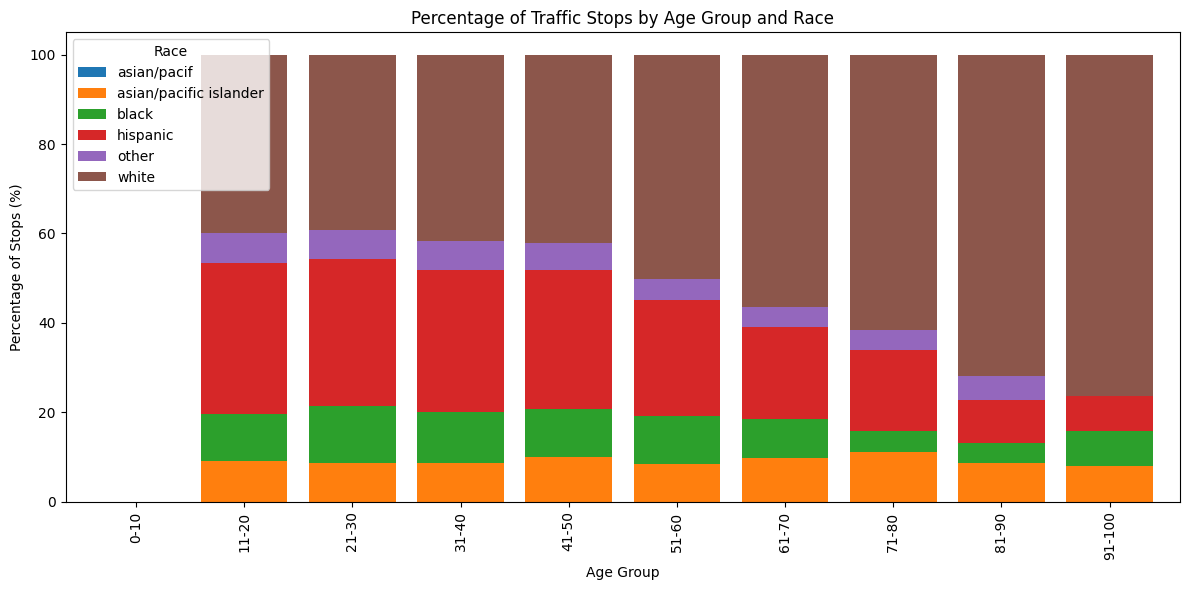

In [16]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

df['age_group'] = pd.cut(df['subject_age'], bins=age_bins, labels=age_labels, right=False)
age_race_counts = df.groupby(['age_group', 'subject_race']).size().unstack(fill_value=0)

age_race_percentage = age_race_counts.div(age_race_counts.sum(axis=1), axis=0) * 100

ax = age_race_percentage.plot(kind='bar', stacked=True, figsize=(12, 6), width = 0.8)

plt.title("Percentage of Traffic Stops by Age Group and Race")
plt.xlabel("Age Group")
plt.ylabel("Percentage of Stops (%)")
plt.legend(title="Race")
plt.tight_layout()
plt.show()

# Age by Race (Stacked with Raw Counts)

<ipython-input-42-2a33d45a3004>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_race_counts = df.groupby(['age_group', 'subject_race']).size().unstack(fill_value=0)


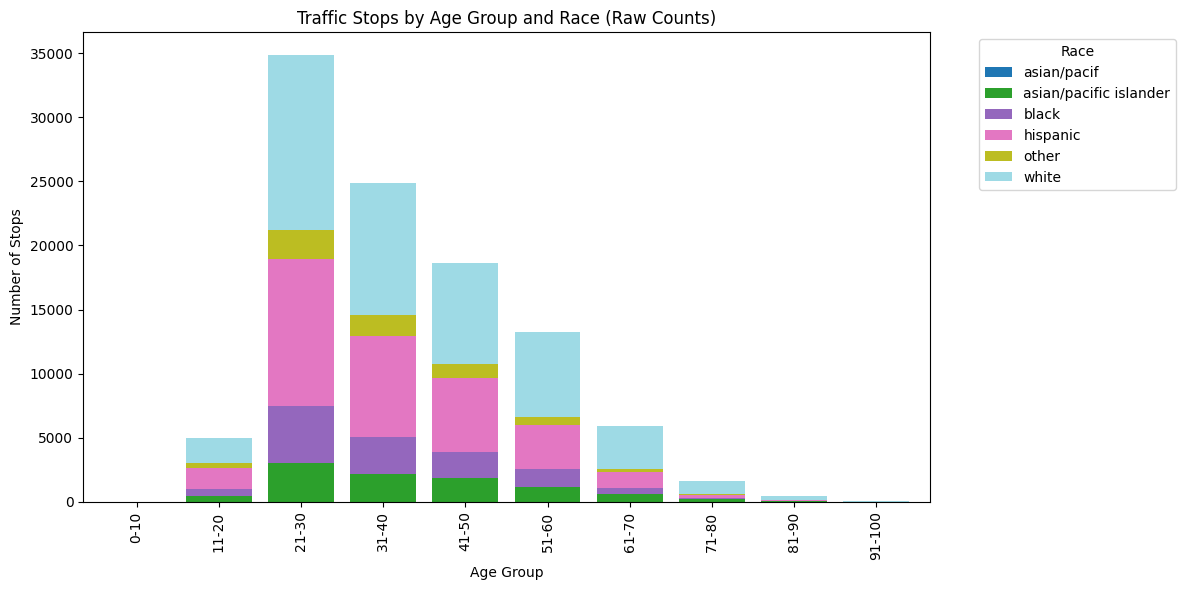

In [42]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

df['age_group'] = pd.cut(df['subject_age'], bins=age_bins, labels=age_labels, right=False)

age_race_counts = df.groupby(['age_group', 'subject_race']).size().unstack(fill_value=0)

ax = age_race_counts.plot(kind='bar', stacked=True, figsize=(12, 6), width=0.8, colormap='tab20')
plt.title("Traffic Stops by Age Group and Race (Raw Counts)")
plt.xlabel("Age Group")
plt.ylabel("Number of Stops")
plt.legend(title="Race", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


# Age by Race (Grouped)


<ipython-input-18-36d03aed5589>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_race_counts = df.groupby(['age_group', 'subject_race']).size().unstack(fill_value=0)


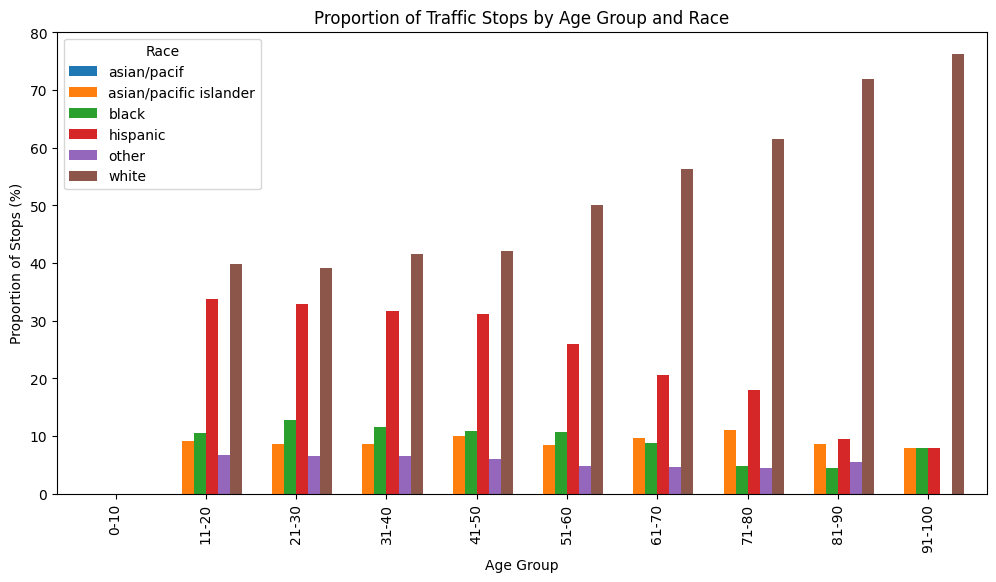

In [18]:
age_race_counts = df.groupby(['age_group', 'subject_race']).size().unstack(fill_value=0)

age_race_percentage = age_race_counts.div(age_race_counts.sum(axis=1), axis=0) * 100

ax = age_race_percentage.plot(kind='bar', figsize=(12, 6), width=0.8)

plt.title("Proportion of Traffic Stops by Age Group and Race")
plt.xlabel("Age Group")
plt.ylabel("Proportion of Stops (%)")
plt.legend(title="Race")
plt.show()

# Officer Evaluation

In [19]:
# search_success_by_service = df[df['search_conducted'] == 'Yes'].groupby('officer_years_of_service')['contraband_found'].mean()
# print(search_success_by_service)

# Women vs Men!
The point of checking the total amount of entries with Citation, Verbal Warning, and Written Warning is to ensure there are enough entries to be able to erase all the ones that have something like "Citation|Verbal Warning| Citation"

In [20]:
#print(df['raw_action_taken'].unique())

a = ((df['raw_action_taken'] == 'Citation').sum())
b = ((df['raw_action_taken'] == 'Verbal Warning').sum())
c = ((df['raw_action_taken'] == 'Written Warning').sum())
total = (df['raw_action_taken'].count())

proportion = (a + b + c) / total
#proportion

df_filtered = df[df['raw_action_taken'].isin(['Citation', 'Verbal Warning', 'Written Warning'])]



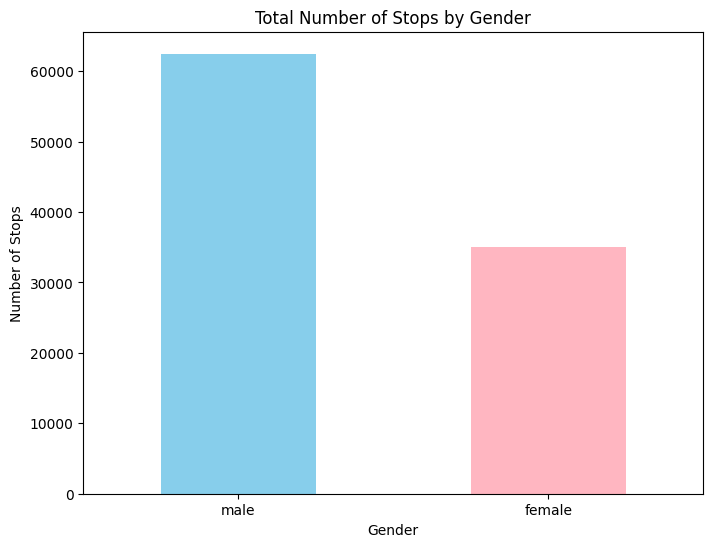

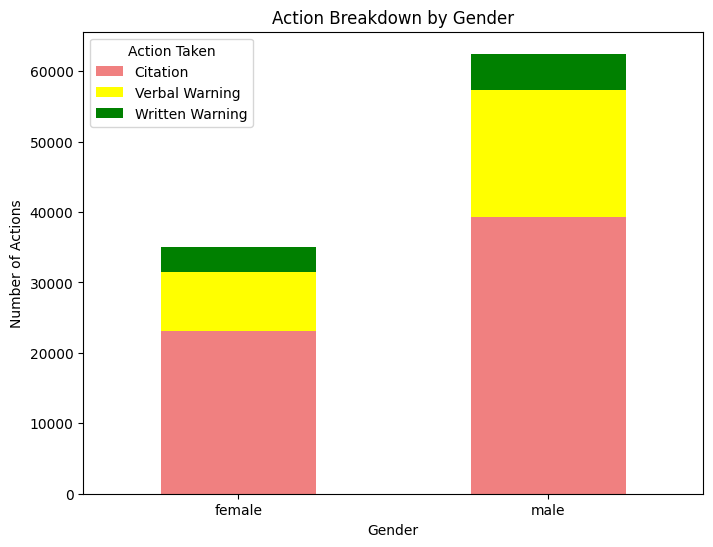

In [21]:
gender_counts = df_filtered['subject_sex'].value_counts()

action_counts = df_filtered.groupby(['subject_sex', 'raw_action_taken']).size().unstack(fill_value=0)

plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color=['skyblue', 'lightpink'])
plt.title('Total Number of Stops by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Stops')
plt.xticks(rotation=0)
plt.show()

# Plotting the action breakdown for each gender
action_counts.plot(kind='bar', stacked=True, figsize=(8, 6), color=['lightcoral', 'yellow', 'green'])
plt.title('Action Breakdown by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Actions')
plt.xticks(rotation=0)
plt.legend(title='Action Taken')
plt.show()

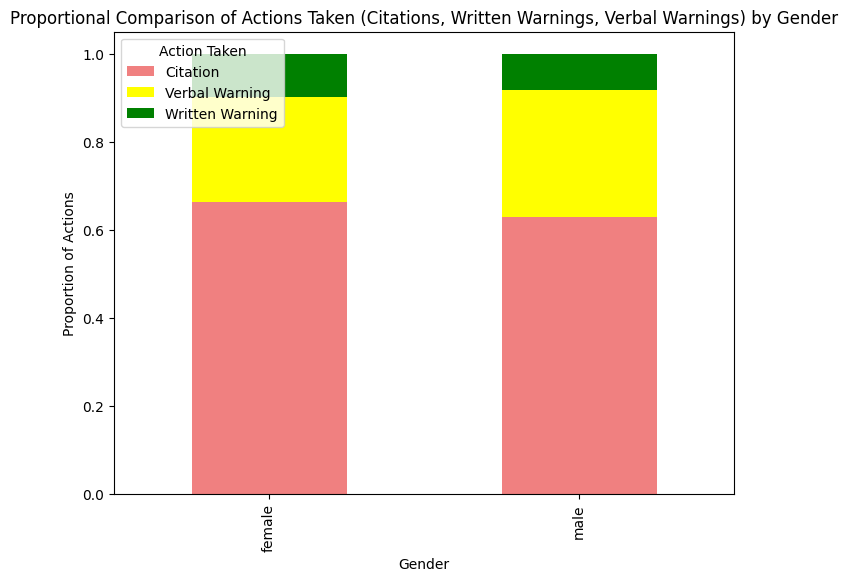

In [22]:
action_counts = df_filtered.groupby(['subject_sex', 'raw_action_taken']).size().unstack(fill_value=0)
action_counts_normalized = action_counts.div(action_counts.sum(axis=1), axis=0)
action_counts_normalized.plot(kind='bar', stacked=True, figsize=(8, 6), color=['lightcoral', 'yellow', 'green'])

plt.title('Proportional Comparison of Actions Taken (Citations, Written Warnings, Verbal Warnings) by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion of Actions')
plt.legend(title='Action Taken', loc='upper left')
plt.show()

# Vehicle information


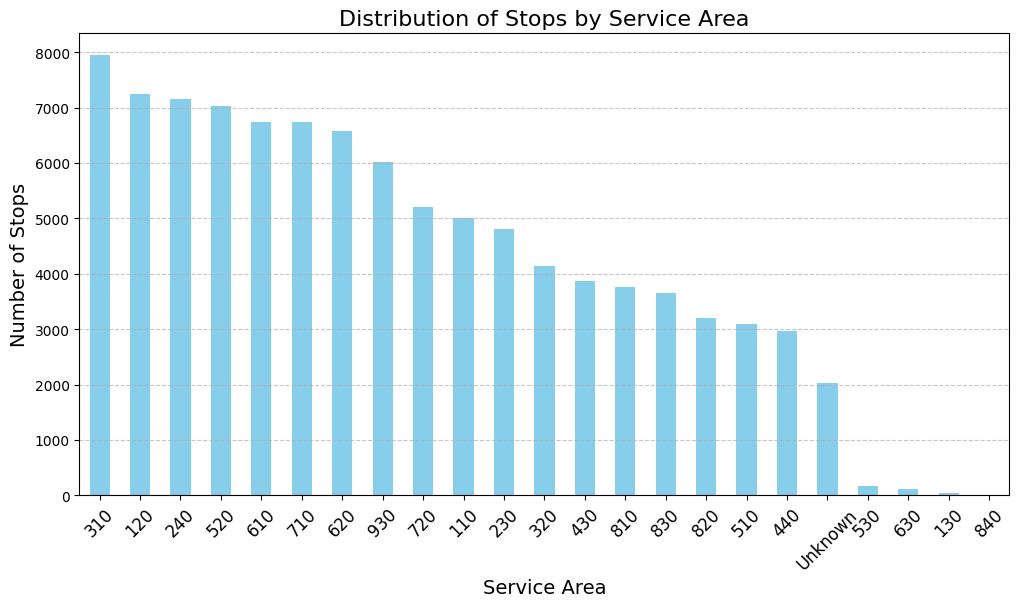

In [23]:

# Plotting a bar chart of stops by service area
stops_by_area = df_filtered['service_area'].value_counts()
stops_by_area.plot(kind='bar', color='skyblue', figsize=(12, 6))

plt.title('Distribution of Stops by Service Area', fontsize=16)
plt.xlabel('Service Area', fontsize=14)
plt.ylabel('Number of Stops', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


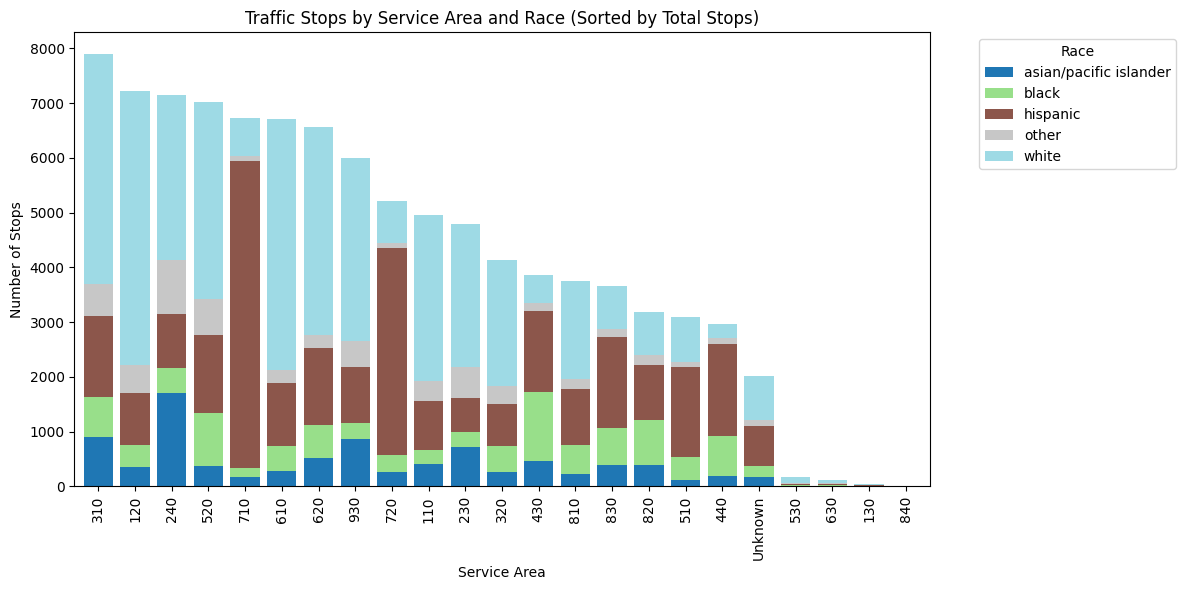

In [24]:
# group data by service area and race
service_area_race_counts = df_filtered.groupby(['service_area', 'subject_race']).size().unstack(fill_value=0)

# sort by total stops in descending order
service_area_race_counts['Total_Stops'] = service_area_race_counts.sum(axis=1)
service_area_race_counts = service_area_race_counts.sort_values(by='Total_Stops', ascending=False)  # Sort by total stops
service_area_race_counts = service_area_race_counts.drop(columns='Total_Stops')  # Remove the total stops column (optional)

# plot the sorted bar chart
ax = service_area_race_counts.plot(kind='bar', stacked=True, figsize=(12, 6), width=0.8, colormap='tab20')
plt.title("Traffic Stops by Service Area and Race (Sorted by Total Stops)")
plt.xlabel("Service Area")
plt.ylabel("Number of Stops")
plt.legend(title="Race", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

In [25]:
# Filter data for a specific service area (e.g., 710)
service_area_710 = df_filtered[df_filtered['service_area'] == 710]

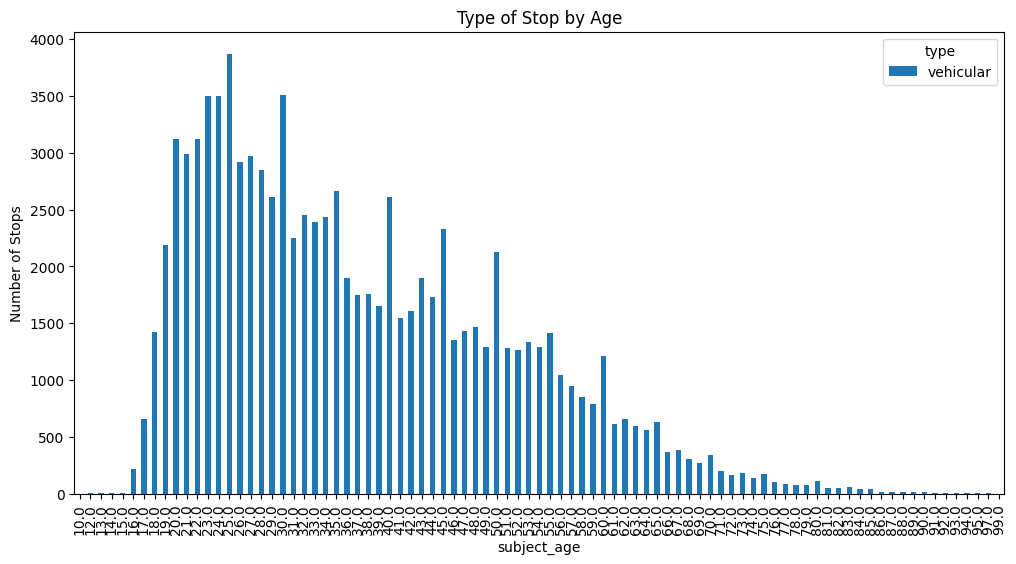

In [26]:
age_type_counts = df_filtered.groupby(['subject_age', 'type']).size().unstack()
age_type_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Type of Stop by Age')
plt.ylabel('Number of Stops')
plt.show()


<ipython-input-27-0ba49ebff36b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['hour_of_day'] = pd.to_datetime(df_filtered['time'], format='%H:%M:%S').dt.hour


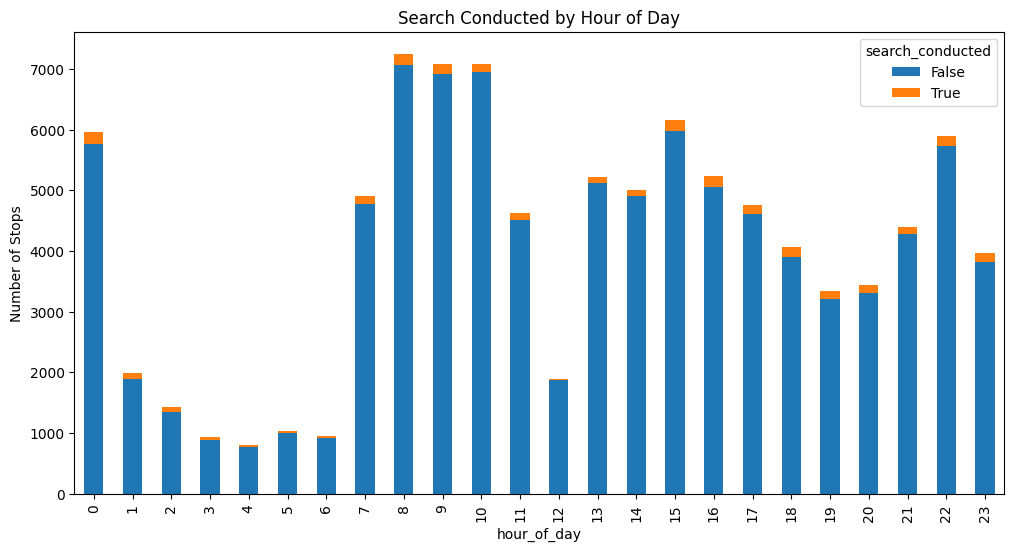

In [27]:
df_filtered['hour_of_day'] = pd.to_datetime(df_filtered['time'], format='%H:%M:%S').dt.hour
search_time_counts = df_filtered.groupby(['hour_of_day', 'search_conducted']).size().unstack()
search_time_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Search Conducted by Hour of Day')
plt.ylabel('Number of Stops')
plt.show()


<ipython-input-28-2cbe88cd1baa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['hour_of_day'] = pd.to_datetime(df_filtered['time'], format='%H:%M:%S').dt.hour


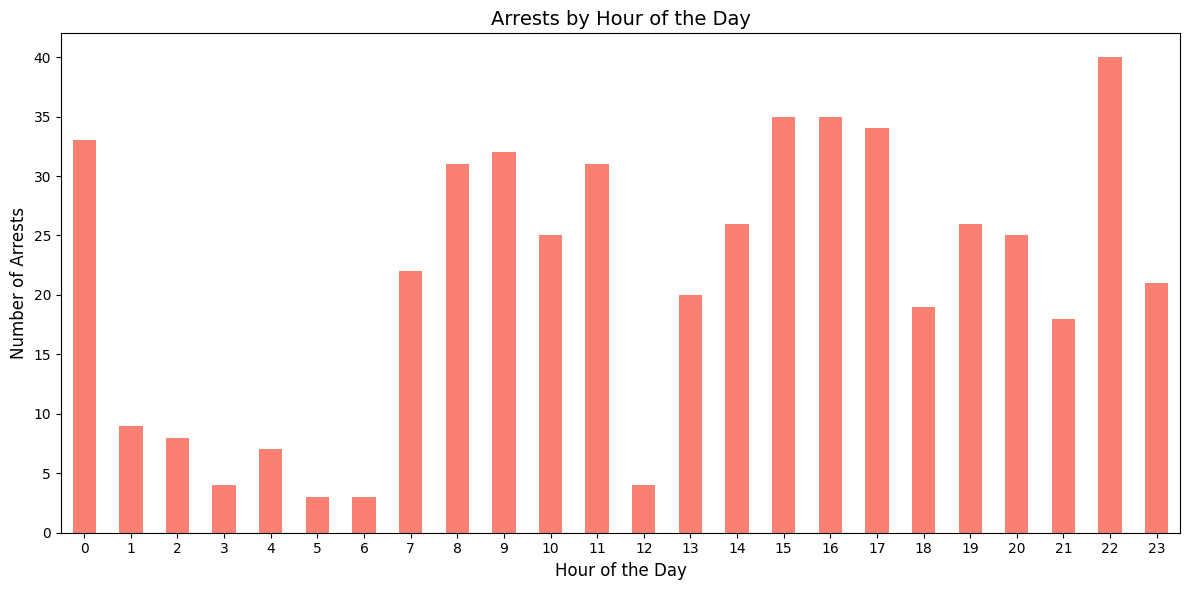

hour_of_day
0     33
1      9
2      8
3      4
4      7
5      3
6      3
7     22
8     31
9     32
10    25
11    31
12     4
13    20
14    26
15    35
16    35
17    34
18    19
19    26
20    25
21    18
22    40
23    21
dtype: int64


In [28]:

# Extract hour of day from the time column
df_filtered['hour_of_day'] = pd.to_datetime(df_filtered['time'], format='%H:%M:%S').dt.hour

# Filter data for arrests (arrest_made == True)
df_arrests = df_filtered[df_filtered['arrest_made'] == True]

# Group by hour of day and arrest_made, then count the occurrences
search_time_counts = df_arrests.groupby('hour_of_day').size()

# Plot the filtered data (only arrests)
search_time_counts.plot(kind='bar', figsize=(12, 6), color='salmon')

# Customize plot with title and labels
plt.title('Arrests by Hour of the Day', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Arrests', fontsize=12)
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.tight_layout()

# Show the plot
plt.show()

# Optionally, display the counts for inspection
print(search_time_counts)

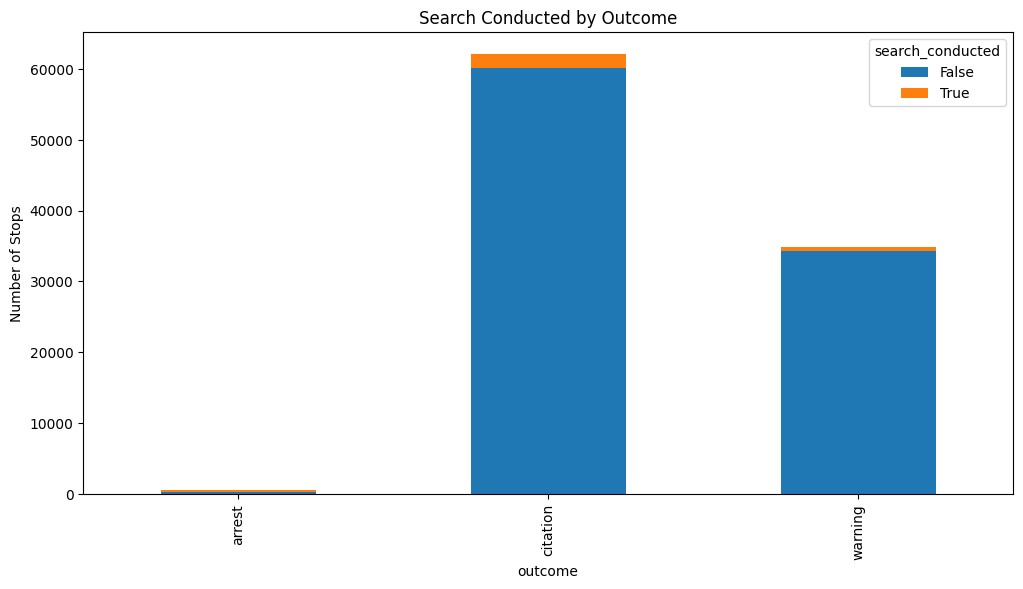

In [29]:
outcome_search_counts = df_filtered.groupby(['outcome', 'search_conducted']).size().unstack()
outcome_search_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Search Conducted by Outcome')
plt.ylabel('Number of Stops')
plt.show()

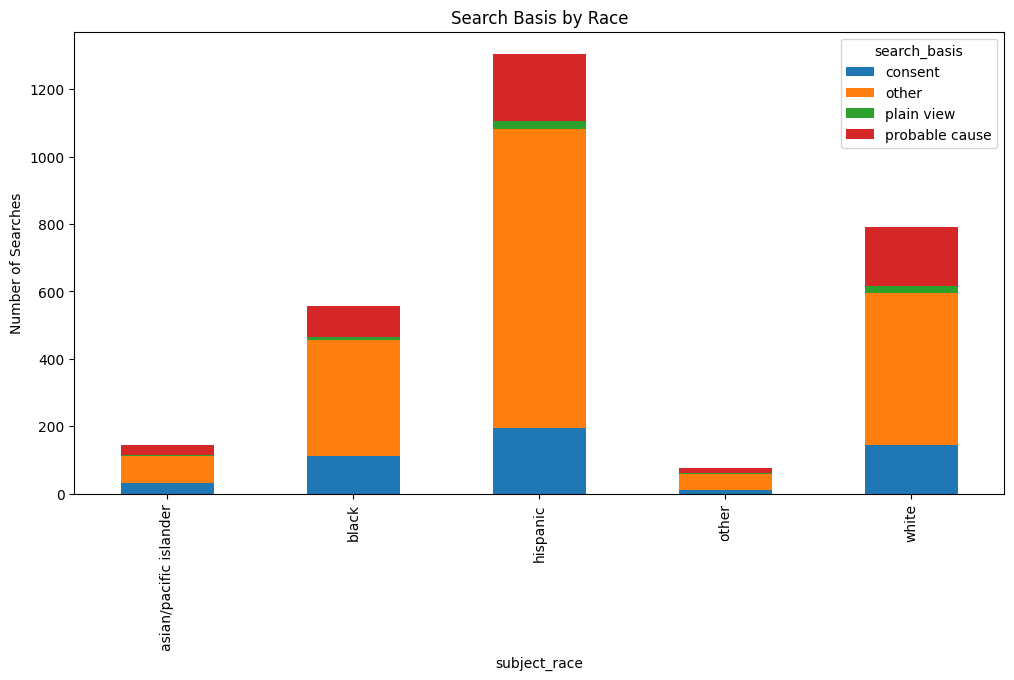

In [30]:
race_search_basis = df_filtered.groupby(['subject_race', 'search_basis']).size().unstack()
race_search_basis.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Search Basis by Race')
plt.ylabel('Number of Searches')
plt.show()

<ipython-input-31-1ff449cf32cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['day_of_week'] = pd.to_datetime(df_filtered['date'], format='%Y-%m-%d').dt.day_name()


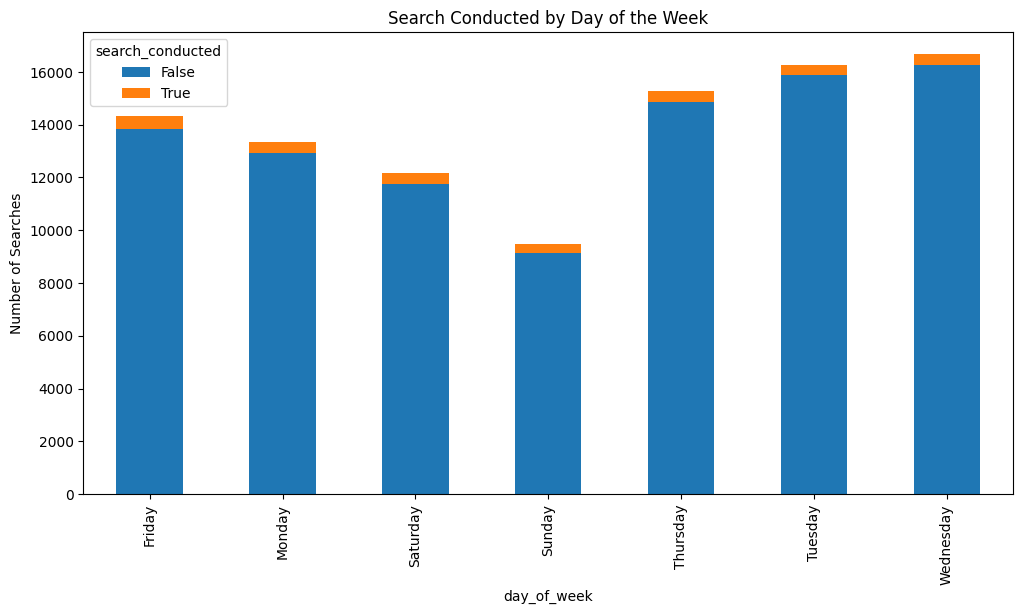

In [31]:
df_filtered['day_of_week'] = pd.to_datetime(df_filtered['date'], format='%Y-%m-%d').dt.day_name()
search_by_day = df_filtered.groupby(['day_of_week', 'search_conducted']).size().unstack()
search_by_day.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Search Conducted by Day of the Week')
plt.ylabel('Number of Searches')
plt.show()

In [32]:
# arrest_by_reason = df_filtered.groupby('reason_for_stop')['arrest_made'].mean()
# arrest_by_reason.plot(kind='bar', figsize=(12, 6))
# plt.title('Arrest Rate by Reason for Stop')
# plt.ylabel('Arrest Rate')
# plt.show()

In [33]:
# arrest_by_reason_time = df_filtered.groupby(['reason_for_stop', 'hour_of_day'])['arrest_made'].mean()
# arrest_by_reason_time.unstack().plot(kind='line', figsize=(12, 6))
# plt.title('Arrest Rate by Reason for Stop and Hour of Day')
# plt.ylabel('Arrest Rate')
# plt.show()

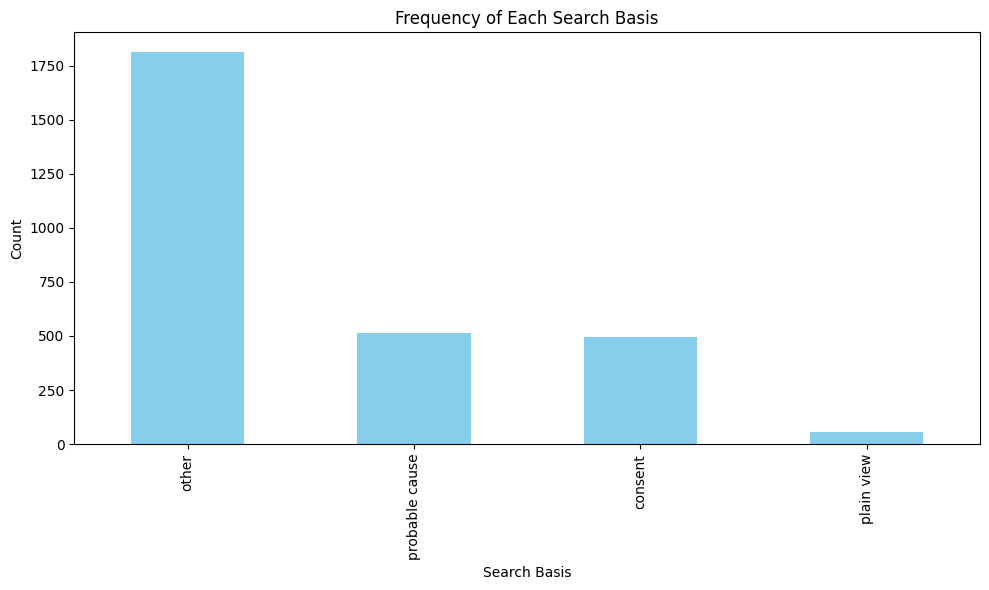

search_basis
other             1813
probable cause     513
consent            495
plain view          56
Name: count, dtype: int64


In [34]:
# Count the occurrences of each search basis
search_basis_counts = df_filtered['search_basis'].value_counts()

# Plot the counts of each search basis
search_basis_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Frequency of Each Search Basis')
plt.xlabel('Search Basis')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Optionally, display the counts
print(search_basis_counts)








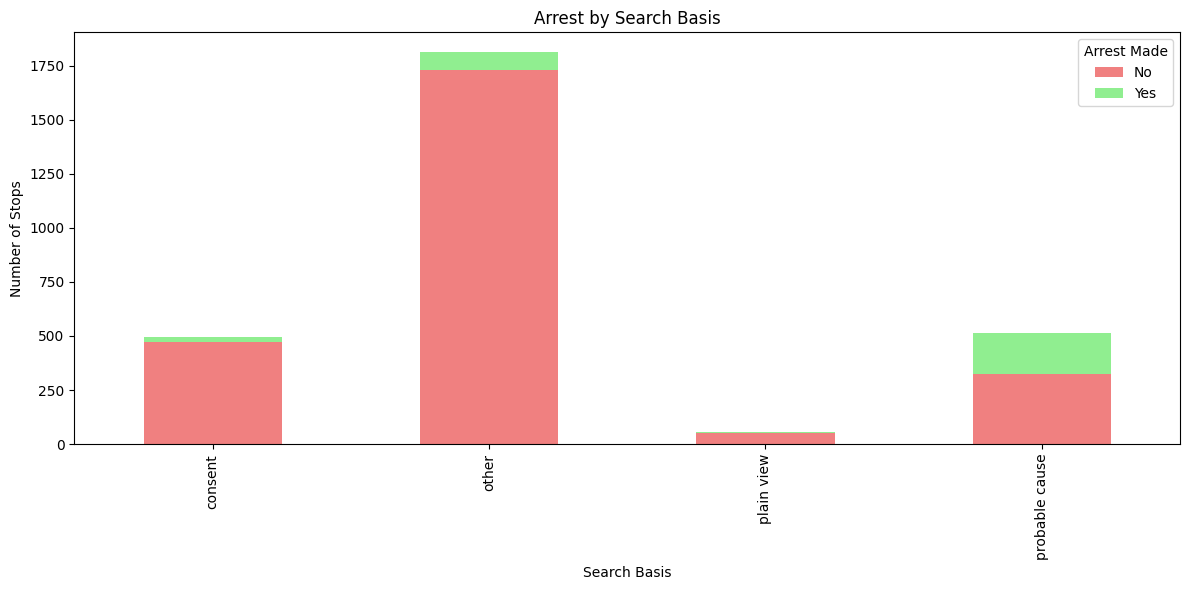

arrest_made     False  True 
search_basis                
consent           470     25
other            1730     83
plain view         49      7
probable cause    324    188


In [35]:
# Group by search_basis and arrest_made to get counts
search_basis_arrest = df_filtered.groupby(['search_basis', 'arrest_made']).size().unstack(fill_value=0)

# Plot the data as a stacked bar chart
search_basis_arrest.plot(kind='bar', stacked=True, figsize=(12, 6), color=['lightcoral', 'lightgreen'])
plt.title('Arrest by Search Basis')
plt.xlabel('Search Basis')
plt.ylabel('Number of Stops')
plt.legend(title='Arrest Made', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

# Optionally, print the counts for inspection
print(search_basis_arrest)


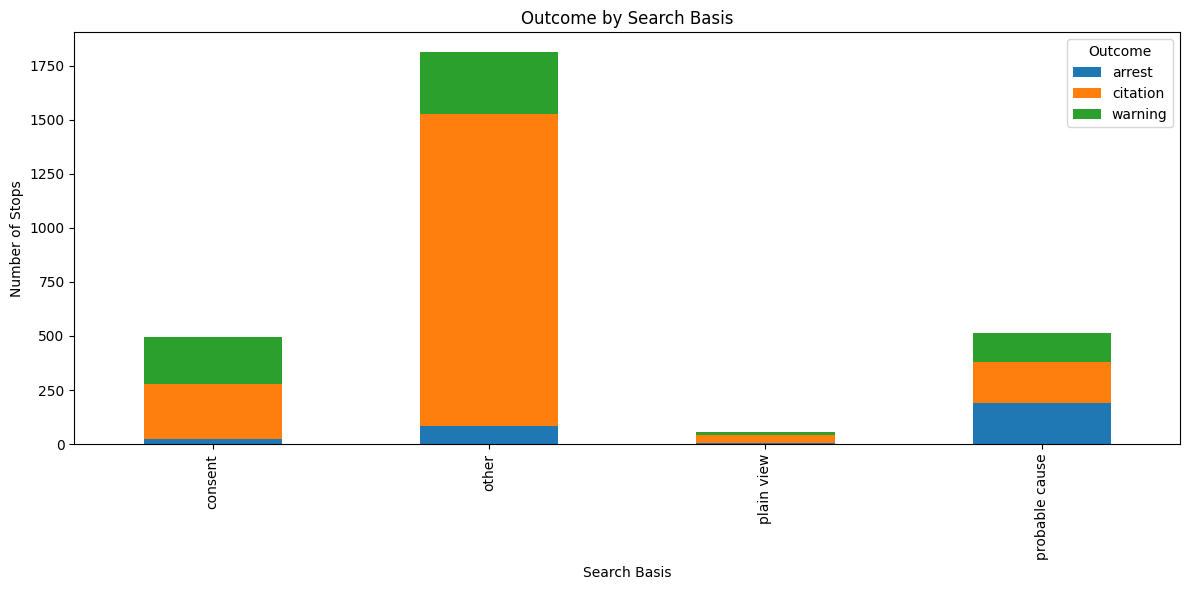

outcome         arrest  citation  warning
search_basis                             
consent             25       254      216
other               83      1445      285
plain view           7        33       16
probable cause     188       193      132


In [36]:
# Group by search_basis and outcome to get counts
search_basis_outcome = df_filtered.groupby(['search_basis', 'outcome']).size().unstack(fill_value=0)

# Plot the data as a stacked bar chart
search_basis_outcome.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Outcome by Search Basis')
plt.xlabel('Search Basis')
plt.ylabel('Number of Stops')
plt.legend(title='Outcome')
plt.tight_layout()
plt.show()

# Optionally, print the counts for inspection
print(search_basis_outcome)


<ipython-input-37-fa45bb4f3fc9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['hour_of_day'] = pd.to_datetime(df_filtered['time'], format='%H:%M:%S').dt.hour


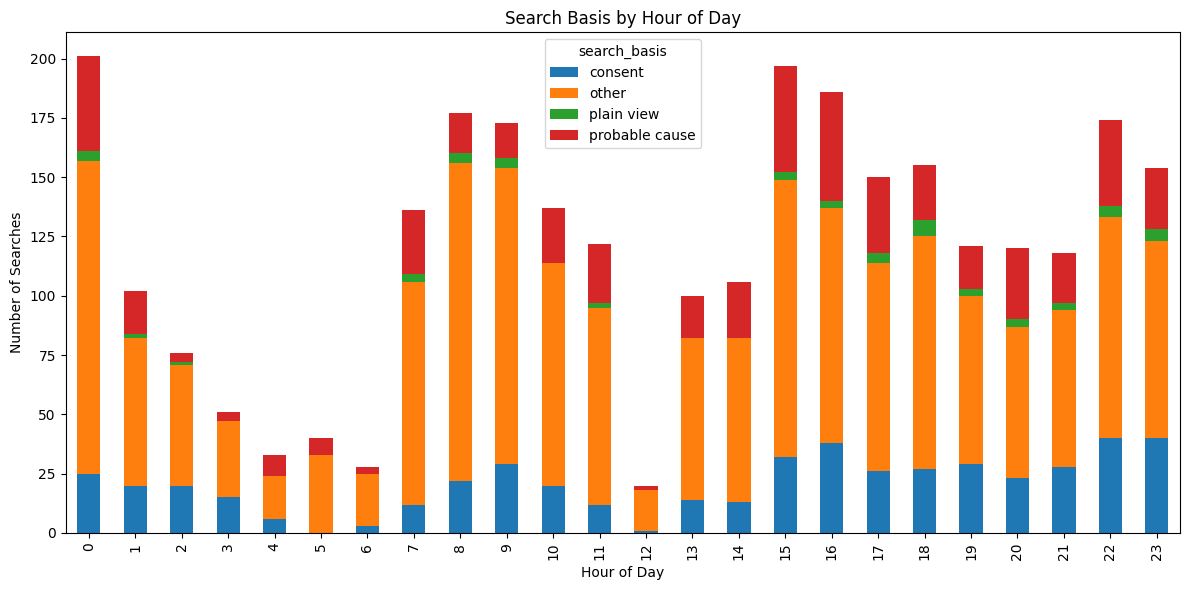

search_basis  consent  other  plain view  probable cause
hour_of_day                                             
0                  25    132           4              40
1                  20     62           2              18
2                  20     51           1               4
3                  15     32           0               4
4                   6     18           0               9
5                   0     33           0               7
6                   3     22           0               3
7                  12     94           3              27
8                  22    134           4              17
9                  29    125           4              15
10                 20     94           0              23
11                 12     83           2              25
12                  1     17           0               2
13                 14     68           0              18
14                 13     69           0              24
15                 32    117   

In [37]:
# Create an hour_of_day column
df_filtered['hour_of_day'] = pd.to_datetime(df_filtered['time'], format='%H:%M:%S').dt.hour

# Group by hour_of_day and search_basis to get counts
search_basis_hour = df_filtered.groupby(['hour_of_day', 'search_basis']).size().unstack(fill_value=0)

# Plot the data
search_basis_hour.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Search Basis by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Searches')
plt.tight_layout()
plt.show()

# Optionally, print the counts for inspection
print(search_basis_hour)


<ipython-input-38-c92ff8dc934c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['day_of_week'] = pd.to_datetime(df_filtered['date'], format='%Y-%m-%d').dt.day_name()


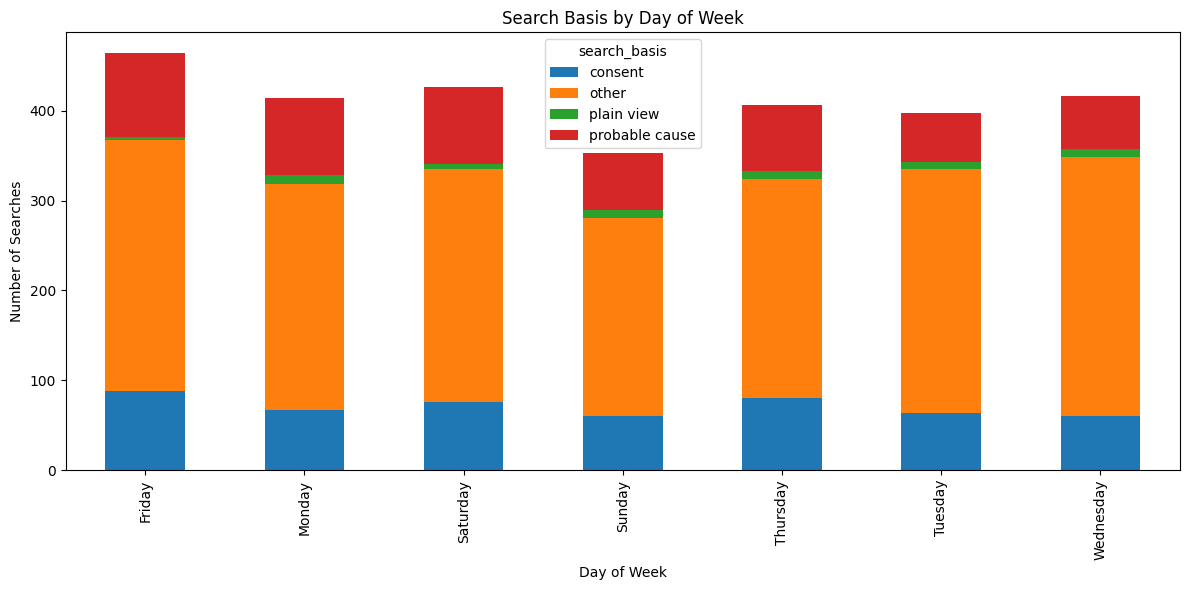

search_basis  consent  other  plain view  probable cause
day_of_week                                             
Friday             88    279           4              93
Monday             67    251          11              85
Saturday           76    259           6              85
Sunday             60    221           9              63
Thursday           80    244           9              73
Tuesday            64    271           8              55
Wednesday          60    288           9              59


In [38]:
# Create a day_of_week column
df_filtered['day_of_week'] = pd.to_datetime(df_filtered['date'], format='%Y-%m-%d').dt.day_name()

# Group by day_of_week and search_basis to get counts
search_basis_day = df_filtered.groupby(['day_of_week', 'search_basis']).size().unstack(fill_value=0)

# Plot the data
search_basis_day.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Search Basis by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Searches')
plt.tight_layout()
plt.show()

# Optionally, print the counts for inspection
print(search_basis_day)


<ipython-input-39-6c0e2b2b9c18>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = pd.to_datetime(df_filtered['date'], format='%Y-%m-%d')
<ipython-input-39-6c0e2b2b9c18>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['day_of_week'] = df_filtered['date'].dt.day_name()


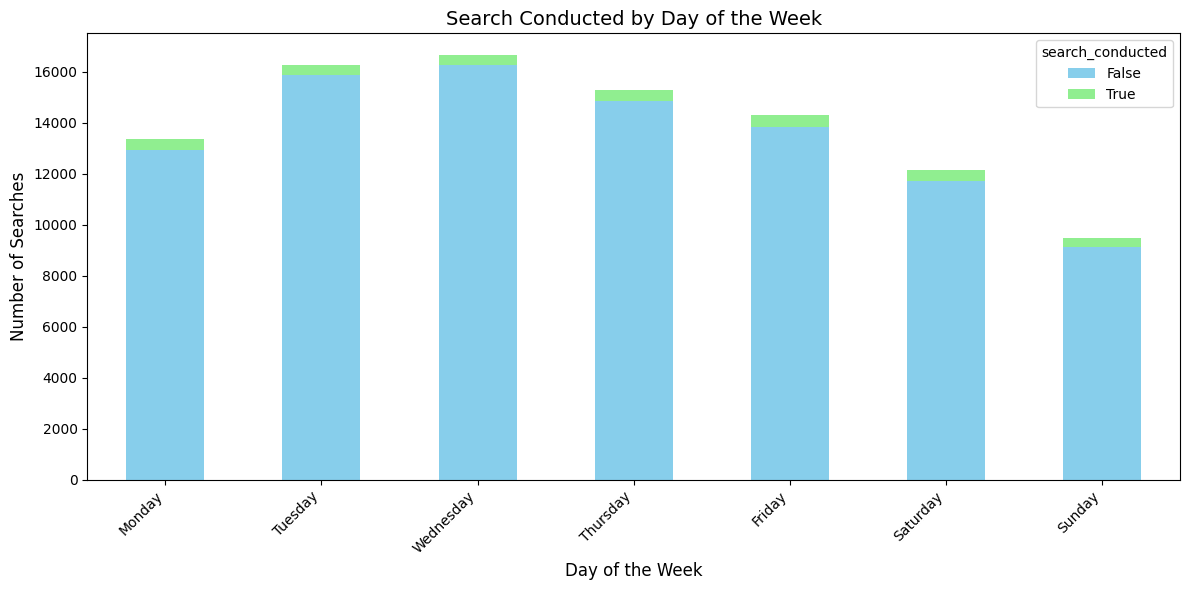

search_conducted  False  True 
day_of_week                   
Monday            12935    414
Tuesday           15868    398
Wednesday         16256    416
Thursday          14863    406
Friday            13849    464
Saturday          11735    426
Sunday             9125    353


In [39]:

# Ensure 'date' column is in datetime format
df_filtered['date'] = pd.to_datetime(df_filtered['date'], format='%Y-%m-%d')

# Extract day of the week as a string (e.g., 'Monday', 'Tuesday', etc.)
df_filtered['day_of_week'] = df_filtered['date'].dt.day_name()

# Group data by day of the week and search_conducted (True/False)
search_by_day = df_filtered.groupby(['day_of_week', 'search_conducted']).size().unstack(fill_value=0)

# Reorder days of the week to ensure they appear in chronological order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
search_by_day = search_by_day.loc[day_order]

# Plot the data as a stacked bar chart
search_by_day.plot(kind='bar', stacked=True, figsize=(12, 6), color=['skyblue', 'lightgreen'])

# Enhance plot with title, labels, and better formatting
plt.title('Search Conducted by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Searches', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure everything fits nicely

# Display the plot
plt.show()

# Optional: Display the grouped data for inspection
print(search_by_day)

# Arrests By Race

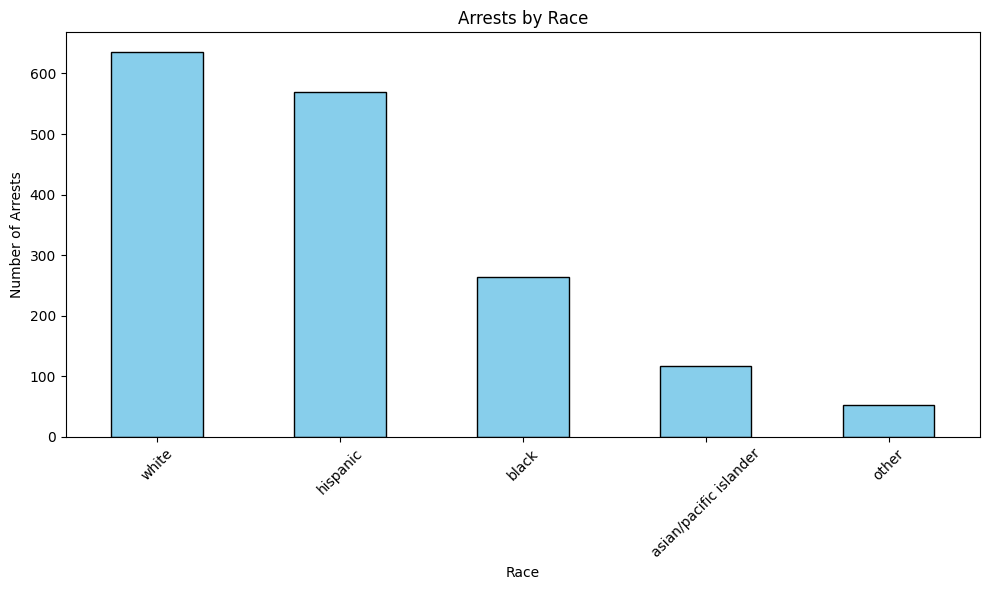

In [43]:
arrests_df = df[df['arrest_made'] == True]

# Group by race and count arrests
arrests_by_race = arrests_df['subject_race'].value_counts(normalize=False)

# Plot the data
plt.figure(figsize=(10, 6))
arrests_by_race.plot(kind='bar', color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Arrests by Race')
plt.xlabel('Race')
plt.ylabel('Number of Arrests')

# Display the plot
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.tight_layout()
plt.show()

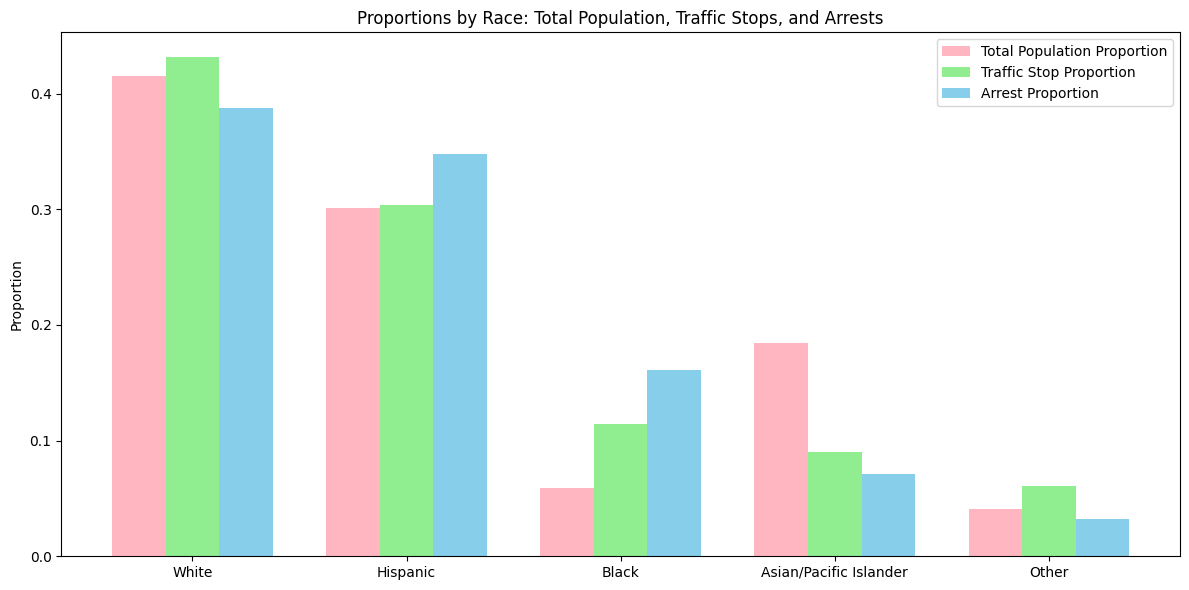

In [63]:
import matplotlib.pyplot as plt



# Example data
race = ['White', 'Hispanic', 'Black', 'Asian/Pacific Islander', 'Other']
arrests = [636, 570, 264, 117, 53]
traffic_stops = [45997, 32341, 12171, 9616, 6490]
total_population = [0.415, 0.301, 0.059, 0.184, 0.041]  # Provided total population proportions

# Normalize the data
arrest_proportions = [x / sum(arrests) for x in arrests]
traffic_stop_proportions = [x / sum(traffic_stops) for x in traffic_stops]

# Bar width and x-axis positions
bar_width = 0.25
x = range(len(race))

# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 6))

# Bars for total population proportions, traffic stop proportions, and arrest proportions
ax.bar([i - bar_width for i in x], total_population, width=bar_width, label='Total Population Proportion', color='lightpink')
ax.bar([i for i in x], traffic_stop_proportions, width=bar_width, label='Traffic Stop Proportion', color='lightgreen')
ax.bar([i + bar_width for i in x], arrest_proportions, width=bar_width, label='Arrest Proportion', color='skyblue')

# Add labels and title
ax.set_xticks(x)
ax.set_xticklabels(race)
ax.set_ylabel('Proportion')
ax.set_title('Proportions by Race: Total Population, Traffic Stops, and Arrests')
ax.legend()

plt.tight_layout()
plt.show()


In [58]:

df_arrests = df[df['arrest_made'] == True]
# Group by race and count arrests (assuming a column 'race' exists)
arrests_by_race = df_arrests['subject_race'].value_counts()

# Convert to a dictionary for easier access
arrest_dict = arrests_by_race.to_dict()

# Print the data
print(arrest_dict)


# Group by race and count the number of traffic stops
traffic_stops_by_race = df['subject_race'].value_counts()

# Convert to a dictionary for easier access (optional)
traffic_stops_dict = traffic_stops_by_race.to_dict()

# Print the traffic stop counts by race
print(traffic_stops_dict)

{'white': 636, 'hispanic': 570, 'black': 264, 'asian/pacific islander': 117, 'other': 53}
{'white': 45997, 'hispanic': 32341, 'black': 12171, 'asian/pacific islander': 9616, 'other': 6490, 'asian/pacif': 1}
